In [42]:
import nltk
import sys
from collections import Counter
import pandas as pd
from os import listdir
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [43]:
folder = 'training-monolingual.tokenized.shuffled/'
files = listdir(folder)

In [44]:
files

['news.en-00001-of-00100',
 'news.en-00002-of-00100',
 'news.en-00003-of-00100',
 'news.en-00004-of-00100',
 'news.en-00005-of-00100',
 'news.en-00006-of-00100',
 'news.en-00007-of-00100',
 'news.en-00008-of-00100',
 'news.en-00009-of-00100',
 'news.en-00010-of-00100',
 'news.en-00011-of-00100',
 'news.en-00012-of-00100',
 'news.en-00013-of-00100',
 'news.en-00014-of-00100',
 'news.en-00015-of-00100',
 'news.en-00016-of-00100',
 'news.en-00017-of-00100',
 'news.en-00018-of-00100',
 'news.en-00019-of-00100',
 'news.en-00020-of-00100',
 'news.en-00021-of-00100',
 'news.en-00022-of-00100',
 'news.en-00023-of-00100',
 'news.en-00024-of-00100',
 'news.en-00025-of-00100',
 'news.en-00026-of-00100',
 'news.en-00027-of-00100',
 'news.en-00028-of-00100',
 'news.en-00029-of-00100',
 'news.en-00030-of-00100',
 'news.en-00031-of-00100',
 'news.en-00032-of-00100',
 'news.en-00033-of-00100',
 'news.en-00034-of-00100',
 'news.en-00035-of-00100',
 'news.en-00036-of-00100',
 'news.en-00037-of-00100',
 

In [45]:
# fn = "1bshort/news.en-00001-of-00100"

wc = Counter()
times = []
types = []
start_time = time.time()
for fn in tqdm(files):
    with open(folder+fn, 'r',encoding="utf8") as f:
        wc += Counter(f.read().split(' '))
        times.append(time.time() - start_time)
        types.append(len(wc))
    f.close()
print("Total time : --- %s seconds ---" % (time.time() - start_time))

100%|██████████| 99/99 [03:07<00:00,  1.90s/it]

Total time : --- 187.68557453155518 seconds ---


In [46]:
df = pd.DataFrame.from_dict(wc, orient='index', columns = ['frequency'])


In [47]:
len(wc)

2851884

In [48]:
len(df)

2851884

In [49]:
print(df)


                        frequency
The                        850976
U.S.                       604446
Centers                      8790
for                       6508821
Disease                      8708
...                           ...
.\nCarefully-regulated          1
LabNearly                       1
benefitsor                      1
Ndoungou                        1
un-prepossessing                1

[2851884 rows x 1 columns]


In [50]:
total_words = df['frequency'].sum()
total_types = len(df)

In [52]:
total_words

738347955

In [53]:
total_types

2851884

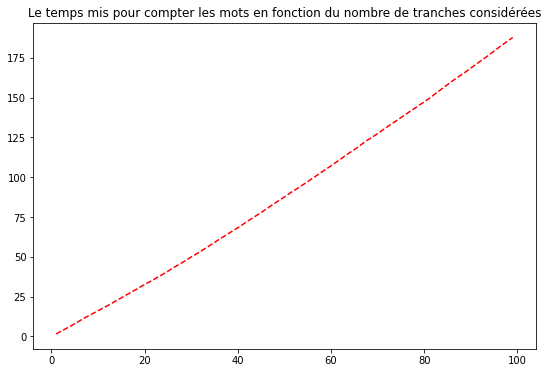

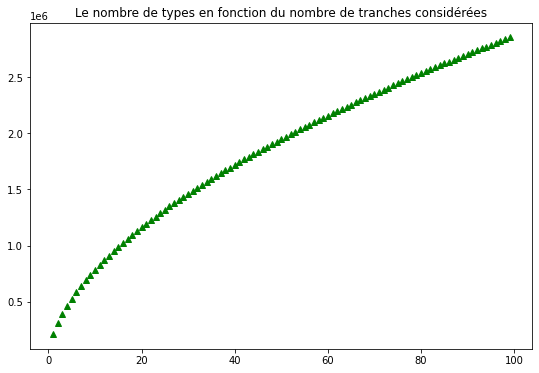

In [58]:
tranches = list(range(1,100))
plt.figure(figsize=(9,6))
plt.plot(tranches, times,'r--')
plt.title("Le temps mis pour compter les mots en fonction du nombre de tranches considérées")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(tranches, types , 'g^')
plt.title("Le nombre de types en fonction du nombre de tranches considérées")
plt.show()